In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''
This code is written by the amazing team dubbed "Team Incapable". 
For readers who are unable to read Dutch, this roughly translate to
"The team that will save the world by their combined skillset"
'''

def parseLine(id, line, tagResult):
    global countV, countH
    splitted = line.split(" ")
    orientation = splitted[0]
    if orientation == 'H':
        countH=countH+1
    else:
        countV=countV+1
    numTags = int(splitted[1])
    tags=[]
    for i in range(numTags):
        tag=splitted[i+2].rstrip()
        tags.append(tag)
        if tag in tagResult:
            tagResult[tag].append(id)
        else:
            tagResult[tag]=[id]
    
    return {"id":id,"Orientation":orientation, "tags":tags}

countH=0
countV=0
def valuate(prevSlide, curSlide):
    return(min(overlapValuation(prevSlide["tags"], curSlide["tags"]), deltaValuation(prevSlide["tags"], curSlide["tags"]), deltaValuation(curSlide["tags"], prevSlide["tags"])))
    
def overlapValuation(prevTags, curTags):
    return(len(list(set(prevTags) & set(curTags))))
    
def deltaValuation(prevTags, curTags):
    return(len(set(prevTags).difference(curTags)))



DataFolder="./inputs/"
#File="a_example.txt"
Files=["a_example.txt",
       "b_lovely_landscapes.txt",
       "c_memorable_moments.txt",
       "d_pet_pictures.txt",
       "e_shiny_selfies.txt",
       ]
Bdata=[]
#File="c_memorable_moments.txt"
#File="d_pet_pictures.txt"
#File="e_shiny_selfies.txt"

resultsRaw = []
for i, File in enumerate(Files):
    f = open(DataFolder+File)

    inputData=[]
    numLines=int(f.readline())
    resultPerTag={}

    for i in range(numLines):
        line = f.readline()
        parsed=parseLine(i, line, resultPerTag)
        inputData.append(parsed)
    resultsRaw.append(inputData)
    f.close()


In [3]:
dfs = []
for rr in resultsRaw:
    df = pd.DataFrame(rr)
    dfs.append(df)

# Distribution of #tags

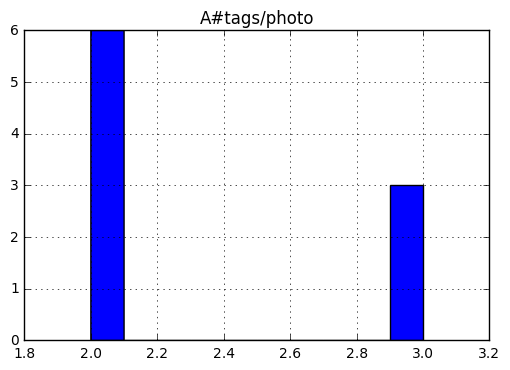

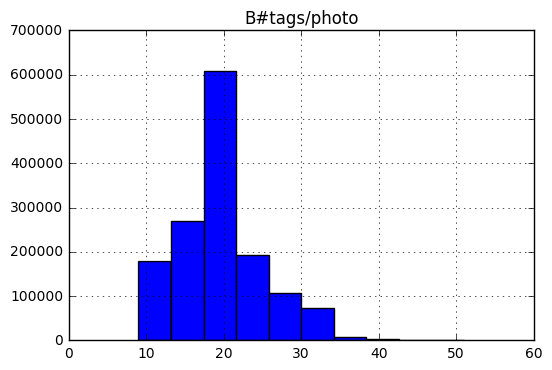

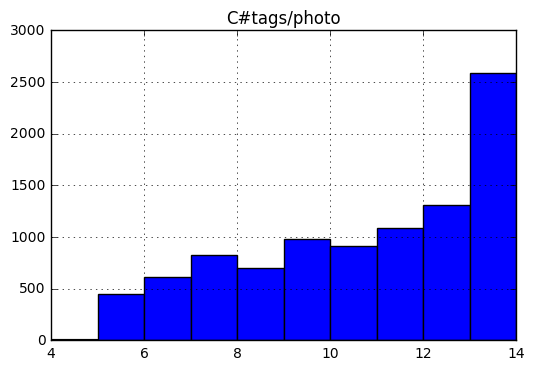

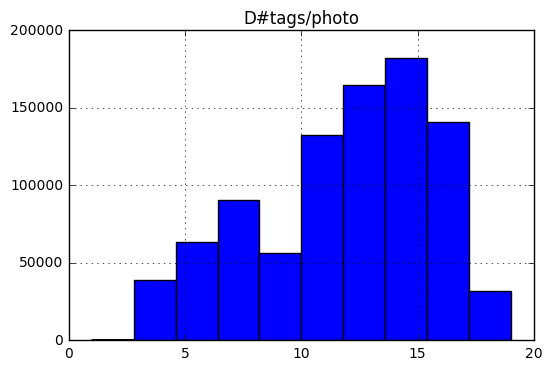

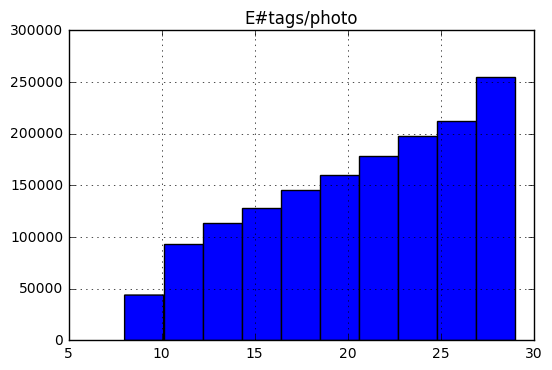

In [4]:
i = 0
for i, df in enumerate(dfs):
    my_df = dfs[i]
    my_df.stack()
    result = pd.DataFrame([(d, tup.id, tup.Orientation, tup.tags) for tup in dfs[i].itertuples() for d in tup.tags])
    result.columns = ['tag', 'id', 'orientation', 'tags']
    lens = result.tags.apply(lambda row: len(row))
    lens.hist()
    plt.title(chr(ord('A') + i) + '#tags/photo')
    plt.show()

In [5]:
i = 0

my_df = dfs[i]
my_df.stack()
result = pd.DataFrame([(d, tup.id, tup.Orientation, tup.tags) for tup in dfs[i].itertuples() for d in tup.tags])
result.columns = ['tag', 'id', 'orientation', 'tags']
result.tag.value_counts().hist()

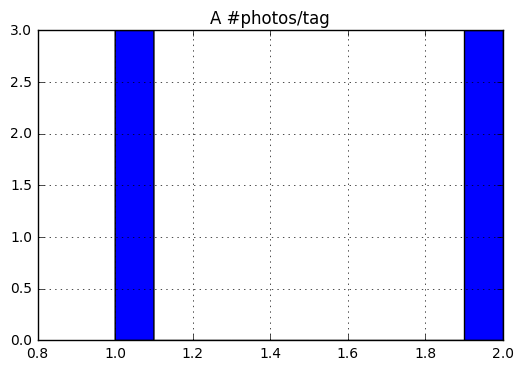

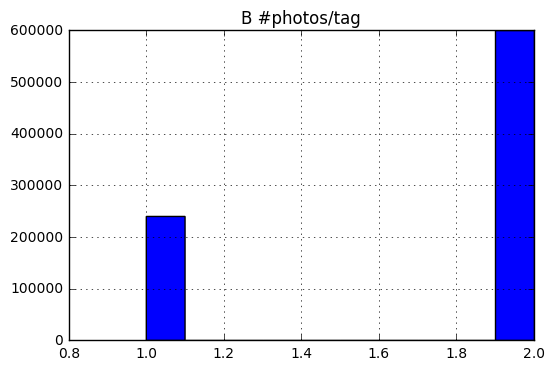

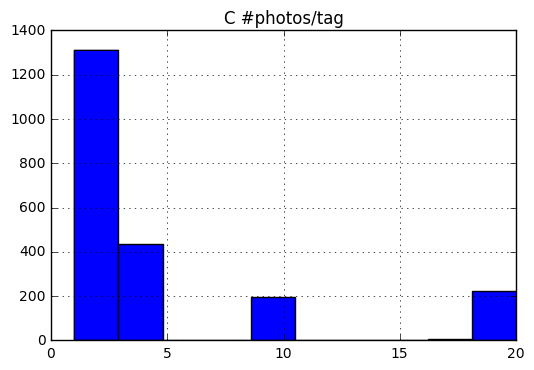

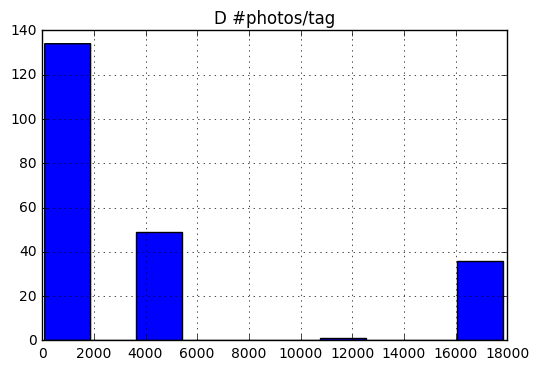

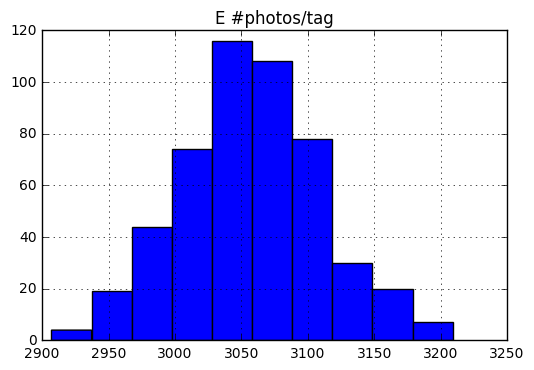

In [9]:
i = 0
for i, df in enumerate(dfs):
    my_df = dfs[i]
    my_df.stack()
    result = pd.DataFrame([(d, tup.id, tup.Orientation, tup.tags) for tup in dfs[i].itertuples() for d in tup.tags])
    result.columns = ['tag', 'id', 'orientation', 'tags']
    lens = result.tag.value_counts()
    lens.hist()
    plt.title(chr(ord('A') + i) + ' #photos/tag')
    plt.show()

{'t9nhw', 'tfhpt', 'tpzzd'}

3

{'t9nhw', 'tfhpt', 'tpzzd'}

{'t79gm', 'tc9jd', 'tldbm'}